<h1 align=center><font size = 10> Classification with Python</font></h1>

# IMPORT NHỮNG THƯ VIỆN CẦN THIẾT

In [134]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# TỔNG QUAN VỀ DATASET

Dữ liệu thu thập của 768 phụ nữ với 8 features chính và 1 biến classification:
- 1: Number of times pregnant
- 2: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- 3: Diastolic blood pressure (mm Hg)
- 4: Triceps skinfold thickness (mm)
- 5: 2-Hour serum insulin (mu U/ml)
- 6: Body mass index (weight in kg/(height in m)^2)
- 7: Diabetes pedigree function
- 8: Age (years)
- 9: The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

# VẤN ĐỀ:

Đây là bài toán phân loại nhị phân có giám sát. Các biết là cố định. Tôi sẽ tiến hành xây dựng mô hình học máy để phận loại: Người bị tiểu đường (nhãn: 1) và Không bị tiểu đường (nhãn: 0)


# KHÁM PHÁ DỮ LIỆU

## Load Data Từ CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Vì dataset không có các nhãn cột, tôi sẽ thêm nhãn cột cho dataset

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [135]:
#TO DO:
df = pd.read_csv("pima-indians-diabetes.csv", names=["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
print('shape của bộ dữ liệu', df.shape)

shape của bộ dữ liệu (768, 9)


# TRỰC QUAN HÓA VÀ XỬ LÝ DỮ LIỆU

## Visualize ma trận tương quan của bộ dữ liệu, để thấy được sự liên quan giữa các features và class
 

In [137]:
#TO DO:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


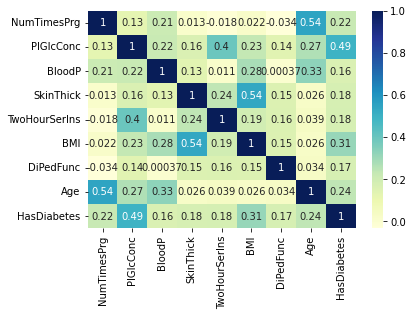

In [173]:
%matplotlib inline
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

NHẬN XÉT:
- Ta có thể thấy, classification bị ảnh hưởng cao bởi [PlGlcConc] (0.47)

In [139]:
print(df['HasDiabetes'].corr(df['PlGlcConc']))

0.46658139830687406


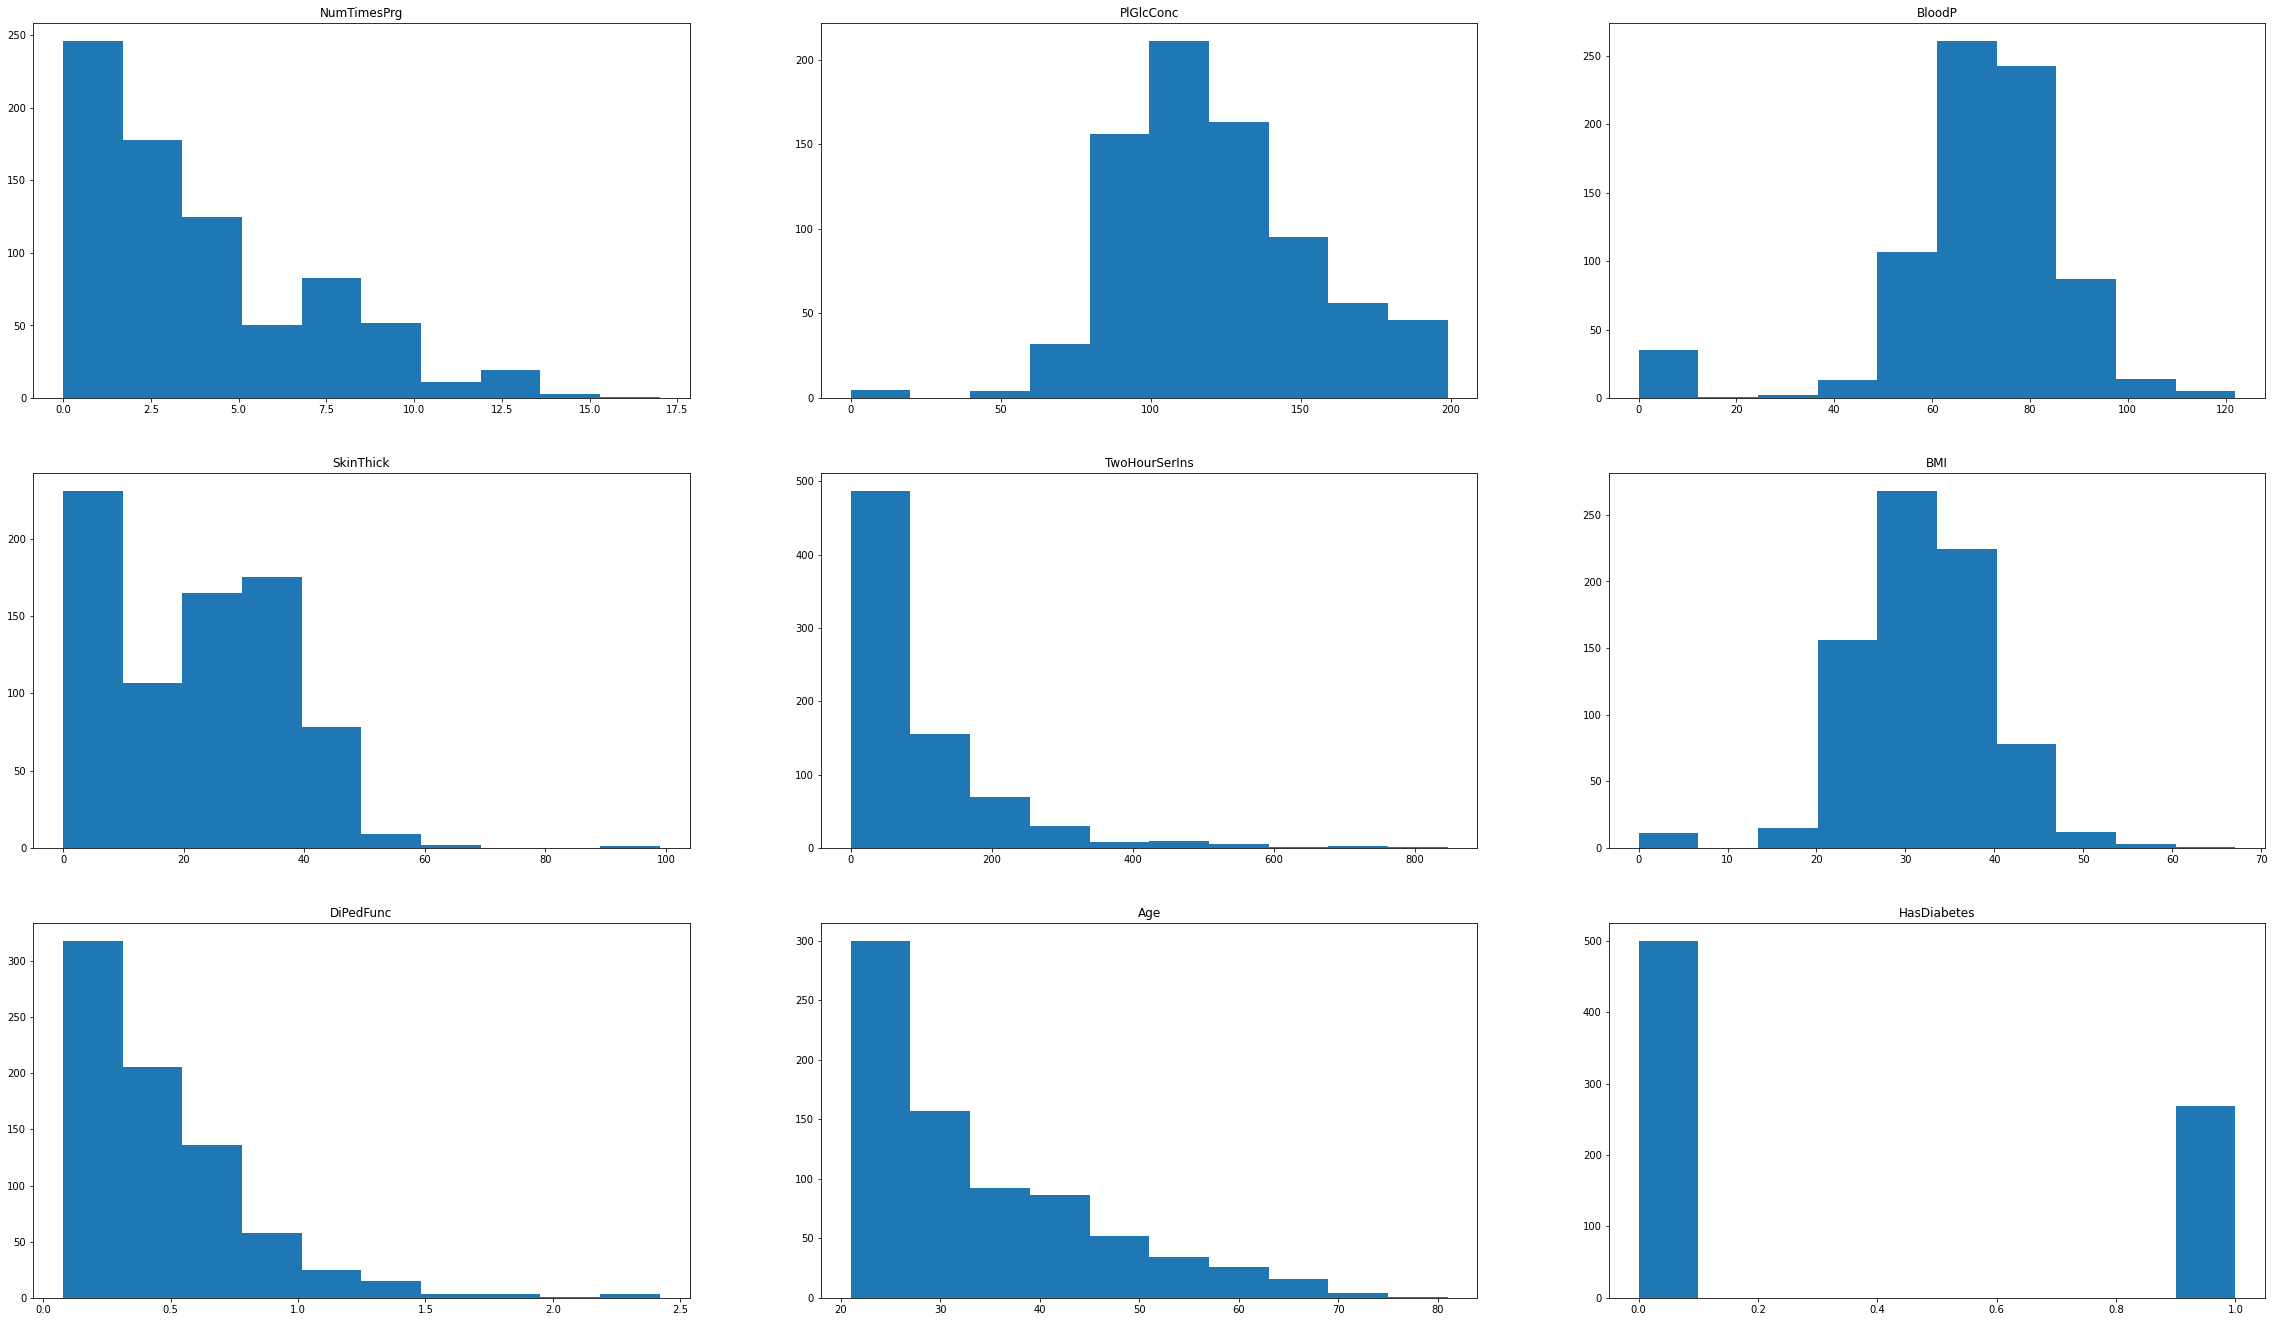

In [140]:
#Visualize biểu đồ phân bố của bộ dữ liệu:
n=1
plt.figure(figsize=(40,40))
for col in df.columns:
    plt.subplot(5,3,n)
    plt.hist(df[col])
    plt.title(col)
    n+=1
plt.rcParams.update({'font.size':25})

NHẬN XÉT:
- Ta có thể thấy có 1 số features có giá trị null. (BMI và blood pressure chứa giá trị 0 là điều không đúng lắm)
- Các features có giá trị missing values:
    + BMI
    + BloodP
    + PlGlcConc
    + SkinThick
    + TwoHourSerlns

# Xử lý dữ liệu

In [141]:
for i in df.columns[1:-3]:
    print('Cột: ',i)
    print((df[i]==0).sum())

Cột:  PlGlcConc
5
Cột:  BloodP
35
Cột:  SkinThick
227
Cột:  TwoHourSerIns
374
Cột:  BMI
11


In [142]:
#TO DO:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodP'] = df['BloodP'].replace(0,df['BloodP'].mean())
df['PlGlcConc'] = df['PlGlcConc'].replace(0,df['PlGlcConc'].mean())
df['SkinThick'] = df['SkinThick'].replace(0,df['SkinThick'].mean())
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(0,df['TwoHourSerIns'].mean())

## Normalize Data 
Vì các set dữ liệu có sự khác nhau lớn. Nên ta cẩn chuẩn hóa dữ liệu. (Ví dụ như Age (Tuổi) thì nằm từ 20->80, nhưng dữ liệu TwohourSerIn thì lại 200->800)

In [143]:
#Chuẩn hóa dữ liệu
X = df.iloc[:,:-1].values
X = preprocessing.StandardScaler().fit(X).transform(X)
Y = df.iloc[:,-1]
std_df = pd.DataFrame(X,columns=df.columns[:-1])

# Splitting the Dataset

In [144]:
# Tách train và test 80/20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(std_df,Y,test_size=0.2,random_state=7)
print('Train_set: ',x_train.shape, y_train.shape)
print('Test_set: ',x_test.shape, y_test.shape)


Train_set:  (614, 8) (614,)
Test_set:  (154, 8) (154,)


# Classification 

Tôi sẽ sử dụng các mô hình sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting


## Import Evaluation Metrices

In [145]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0,'EN_SOFT': 0}


## K Nearest Neighbor(KNN)

## 1 Mô hình hóa

In [146]:
neighbor = [x for x in range(1,100,5)]
acc=[]
for i in neighbor:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_predict = knn.predict(x_test)
    acc.append(f1_score(knn_predict,y_test))
knn_max_f1 = max(tuple(acc))
knn_max_k = neighbor[tuple(acc).index(knn_max_f1)]
print('Giá trị K cho f1-score giá trị tốt nhất: ', knn_max_k)
print('Giá trị f1-score cao nhất: ',knn_max_f1)

Giá trị K cho f1-score giá trị tốt nhất:  31
Giá trị f1-score cao nhất:  0.6875


## 2 Fine-Tuning

In [147]:
#FINE TUNE:
knn_para = dict(n_neighbors = neighbor,weights=['uniform','distance'],algorithm=['auto','ball_tree','kd_tree','brute'])
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knn_para,scoring='accuracy')
grid_search = knn_grid.fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 21, 'weights': 'distance'}


## 3 Pre-train và Evaluate

In [148]:
knn = KNeighborsClassifier(n_neighbors=21,weights='distance',algorithm='auto')
knn.fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)
knn_pred = knn.predict(x_test[['BMI','Age','NumTimesPrg','PlGlcConc']])
print('F1-score: ',f1_score(knn_pred,y_test))

F1-score:  0.7857142857142858


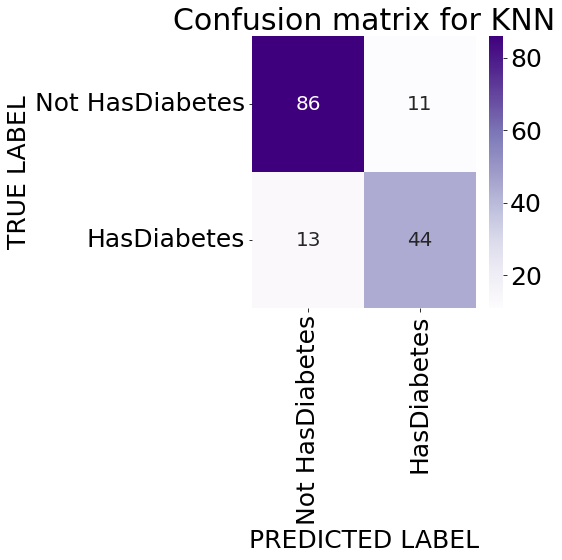

In [149]:
knn_conf = confusion_matrix(y_test,knn_pred)
def confusion_matrix_plot(confusion_matrix,name):
    x_axis_labels = ["Not HasDiabetes", "HasDiabetes"]
    y_axis_labels = ["Not HasDiabetes", "HasDiabetes"]
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix,annot=True,cmap='Purples',annot_kws={'size':20},
                linecolor="black", fmt = ".0f",
                xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.title('Confusion matrix for '+str(name))
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()
confusion_matrix_plot(knn_conf,'KNN')

In [150]:
f1_scores['KNN'] = f1_score(knn_pred,y_test)

NHẬN XÉT:
Sau khi Fine-Tuning: F1-Score tăng từ 68.75% -> 78.5%
Khi giảm bớt Feartures (Chỉ dùng những features có hệ số tương quan cao) thì độ chính xác f1-scores tăng lên


# Decision Tree

## 1 Mô hình hóa

Giá trị f1-score cho mô hình sau khi fine-tuning:  0.7719298245614035


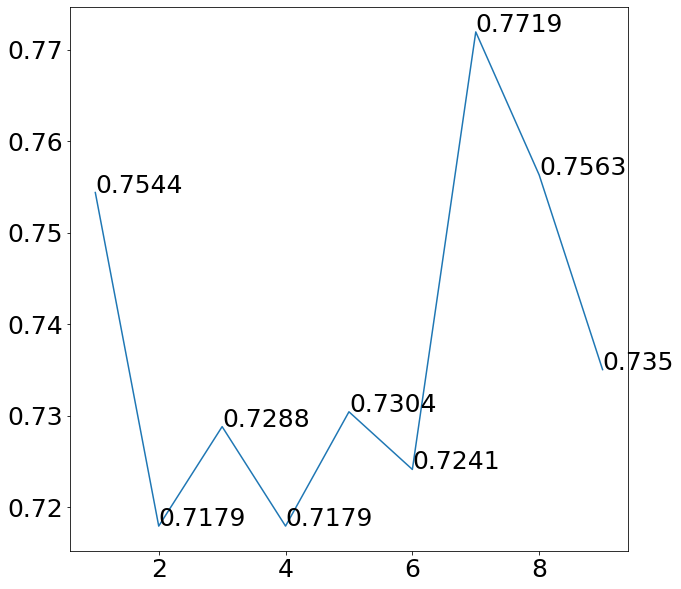

In [151]:
DT_acc_1=[]
for i in range(1,10):
    DT = DecisionTreeClassifier()
    DT.fit(x_train,y_train)
    DT_pred_1 = DT.predict(x_test)
    DT_acc_1.append(f1_score(DT_pred_1,y_test))
plt.figure(figsize=(10,10))
plt.plot([x for x in range(1,10)],DT_acc_1)
for i in range(len(DT_acc_1)):
    plt.text(i+1,DT_acc_1[i],s=round(DT_acc_1[i],4))
print('Giá trị f1-score cho mô hình sau khi fine-tuning: ',max(tuple(DT_acc_1)))

## 2 Fine-Tuning

In [152]:
tree_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DT = GridSearchCV(DecisionTreeClassifier(),param_grid=tree_para,cv=10)
DT.fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)
print(DT.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


## 3 Pre-train và Evalute

Giá trị f1-score cho mô hình sau khi fine-tuning:  0.7610619469026548


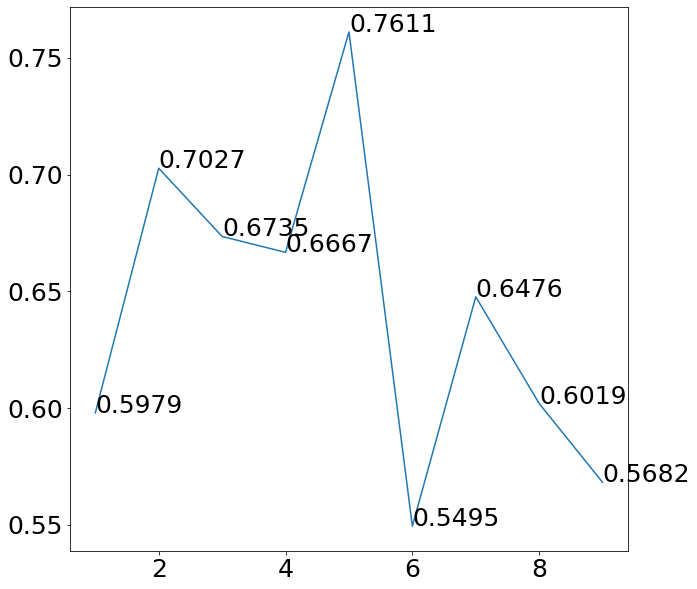

In [153]:
DT_acc= []
for i in range(1,10):
    DT = DecisionTreeClassifier(criterion='log_loss',max_depth=7,splitter='random')
    DT.fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)
    DT_pred_2 = DT.predict(x_test[['BMI','Age','NumTimesPrg','PlGlcConc']])
    DT_acc.append(f1_score(DT_pred_2,y_test))
plt.figure(figsize=(10,10))
plt.plot([x for x in range(1,10)],DT_acc)
for i in range(len(DT_acc)):
    plt.text(i+1,DT_acc[i],s=round(DT_acc[i],4))
print('Giá trị f1-score cho mô hình sau khi fine-tuning: ',max(tuple(DT_acc)))

In [154]:
f1_scores['DT'] = max(tuple(DT_acc))

NHẬN XÉT:
Ta thấy Fine-Tune không đạt hiệu quả.
Ta sẽ lấy kết quả cơ bản ban đầu với các params (default) cơ bản

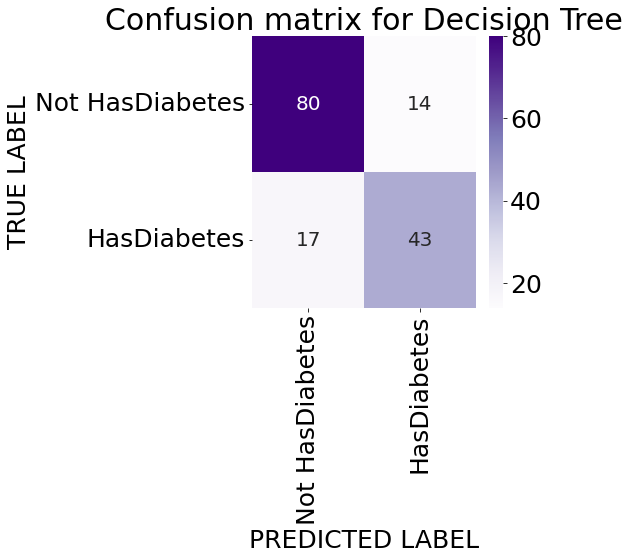

In [155]:
DT_confusion = confusion_matrix(DT_pred_1,y_test)
confusion_matrix_plot(DT_confusion,'Decision Tree')

# Support Vector Machine

## 1 Mô hình hóa

In [156]:
#TO DO:
SVM_model = svm.SVC().fit(x_train,y_train)

svm_pred = SVM_model.predict(x_test)
print(f1_score(svm_pred,y_test))


0.74


## 2 Fine-Tuning

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  
  
grid = GridSearchCV(svm.SVC(), param_grid) 
  
# fitting the model for grid search 
grid.fit(x_train,y_train) 
print(grid.best_params_)

## 3 Pre-train và Evaluate

In [157]:
#TO DO:
SVM_model = svm.SVC(kernel = 'rbf',C=10,gamma=0.01,probability=True).fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)

svm_pred_1 = SVM_model.predict(x_test[['BMI','Age','NumTimesPrg','PlGlcConc']])
print(f1_score(svm_pred_1,y_test))


0.6862745098039216


In [158]:
f1_scores['SVM'] = f1_score(svm_pred,y_test)

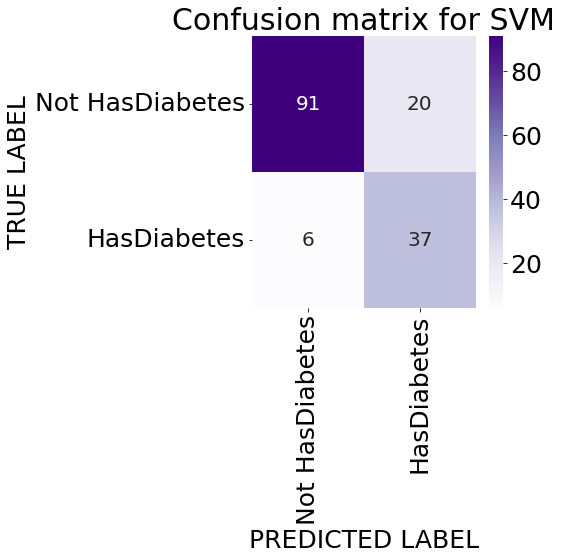

In [159]:
svm_confusion = confusion_matrix(svm_pred,y_test)
confusion_matrix_plot(svm_confusion,'SVM')

NHẬN XÉT:
- Ta thấy mô hình cơ bản ban đầu với toàn bộ dữ liệu cho kết quả chính xác hơn.

# Logistic Regression

## 1 Mô hình

In [160]:
#Chạy mô hình mặc định
logis = LogisticRegression().fit(x_train,y_train)
lgs_pred_1 = logis.predict(x_test)
print(f1_score(lgs_pred_1,y_test))

0.6534653465346535


## 2 Fine-Tuning

In [161]:
logis_para = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['liblinear','sag','saga','newton-cg'],'class_weight':[None,'balanced']}
grid_search_logis = GridSearchCV(LogisticRegression(),logis_para,cv=10,scoring='accuracy')
grid_search_logis.fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)

print(grid_search_logis.best_params_)

{'C': 0.1, 'class_weight': None, 'solver': 'sag'}


## 3 Pre-train và Evaluate

In [162]:
#TO DO:
logis = LogisticRegression(C=0.1,solver = 'sag',class_weight=None).fit(x_train[['BMI','Age','NumTimesPrg','PlGlcConc']],y_train)
lgs_pred = logis.predict(x_test[['BMI','Age','NumTimesPrg','PlGlcConc']])
print(f1_score(lgs_pred,y_test))

0.6862745098039216


In [163]:
f1_scores['LR'] = f1_score(lgs_pred,y_test)

NHẬN XÉT:
- Ta thấy rằng, sau fine-tuning f1-score đạt được cao hơn 3%.

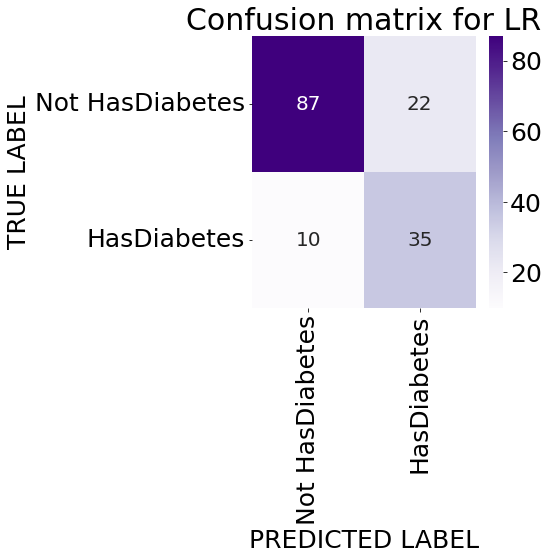

In [164]:
lgs_confusion = confusion_matrix(lgs_pred,y_test)
confusion_matrix_plot(lgs_confusion,'LR')

# Ensemble model

## 1 SOLF VOTING

F1 Test Score: 0.74


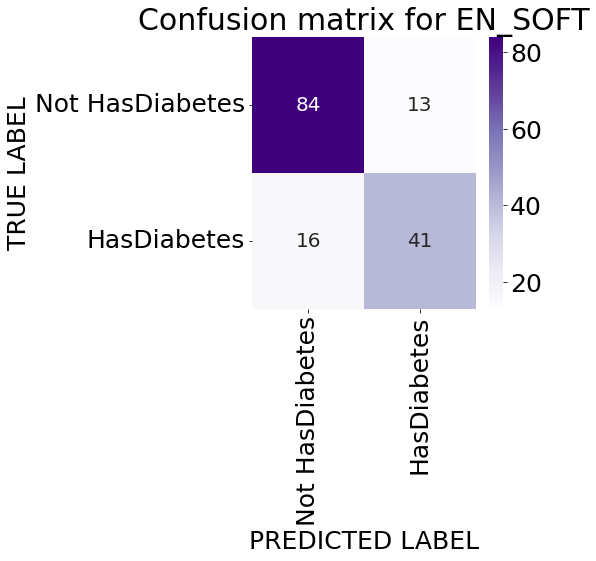

In [165]:
#Ta lấy những thông số tốt nhất sau khi Fine-Tuning:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=21,weights='distance',algorithm='auto')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',svm.SVC(probability=True)))
models.append(('LR',LogisticRegression(C=0.1,solver = 'sag',class_weight=None)))
#create our voting classifier, inputting our models
soft_voting = VotingClassifier(models,voting='soft')
soft_voting.fit(x_train,y_train)
solf_pred = soft_voting.predict(x_test)

print('F1 Test Score: %.2f' % f1_score(y_test,solf_pred))
f1_scores['EN_SOFT'] = f1_score(y_test,solf_pred)
solf_confusion = confusion_matrix(y_test,solf_pred)
confusion_matrix_plot(solf_confusion,'EN_SOFT')

# 2 Hard Voting

F1 Test Score: 0.71


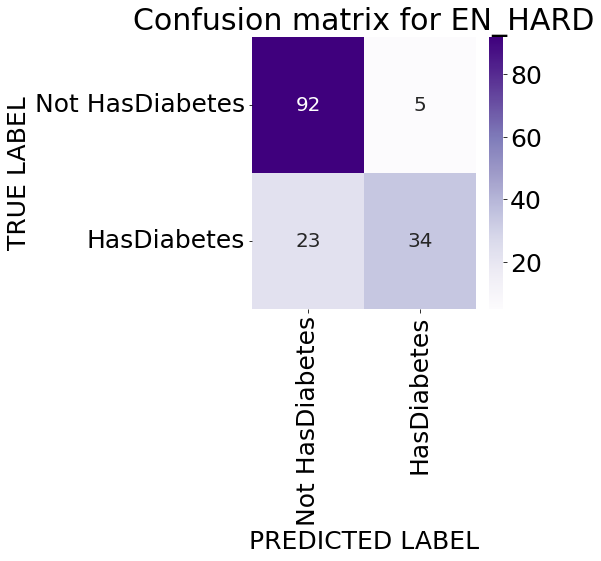

In [166]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=21,weights='distance',algorithm='auto')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',svm.SVC()))
models.append(('LR',LogisticRegression(C=0.1,solver = 'sag',class_weight=None)))
#create our voting classifier, inputting our models
hard_voting = VotingClassifier(models,voting='hard')
hard_voting.fit(x_train,y_train)
hard_pred = hard_voting.predict(x_test)

print('F1 Test Score: %.2f' % f1_score(y_test,hard_pred))
f1_scores['EN_HARD'] = f1_score(y_test,hard_pred)
hard_confusion = confusion_matrix(y_test,hard_pred)
confusion_matrix_plot(hard_confusion,'EN_HARD')

In [172]:
f1_report = pd.DataFrame(f1_scores,index=['f1_score (%)'])
f1_report*100

,KNN,DT,SVM,LR,EN_HARD,EN_SOFT
f1_score (%),78.571429,76.106195,74.0,68.627451,70.833333,73.873874


# KẾT LUẬN:
Sau khi sử dụng nhiều mô hình, ta thấy KNN cho kết quả tốt nhất với f1_score = 78,57%
Mô hình KNN với:
 - train trên các features quan trọng: ['BMI','Age','NumTimesPrg','PlGlcConc']
 - Params: {'algorithm': 'auto', 'n_neighbors': 21, 'weights': 'distance'}